In [371]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import preprocessing_functions
import feature_engineering_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [372]:
df = pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
df = preprocessing_functions.fitbit_basic_preprocessing(df)
df = preprocessing_functions.fitbit_one_hot_encoding(df)

In [373]:
df = preprocessing_functions.date_engineering(df)
df = preprocessing_functions.post_preprocessing(df)
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e301e67b776a240608a72,34.710232,62.604,34.279,14.8,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e301367b776a24057738e,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,72.436947,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e360b67b776a24039709f,33.960471,68.321,31.413,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,68.243822,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
5,621e2fce67b776a240279baa,34.783747,83.170,15.941,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,85.806939,30060000.0,0.0,438.0,63.0,0.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,126.0,735.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,1339.20,45.32795,5308.6,79.583012,0.0,0.0,0.0,1440.0,66.372882,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7587.5,126.0,1110.5,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4960,621e310d67b776a24003096d,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,1252.80,45.32795,5308.6,79.583012,0.0,0.0,0.0,1440.0,66.372882,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7587.5,126.0,1110.5,0.0,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4961,621e324e67b776a2400191cb,33.10

In [374]:
df['id'].nunique()

71

# Adds wear_day

In [375]:
df['wear_day'] = df.apply(feature_engineering_functions.f, axis=1)
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1
1,621e301e67b776a240608a72,34.710232,62.604,34.279,14.8,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1
3,621e301367b776a24057738e,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,72.436947,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1
4,621e360b67b776a24039709f,33.960471,68.321,31.413,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,68.243822,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1
5,621e2fce67b776a240279baa,34.783747,83.170,15.941,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,85.806939,30060000.0,0.0,438.0,63.0,0.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,126.0,735.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,1339.20,45.32795,5308.6,79.583012,0.0,0.0,0.0,1440.0,66.372882,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7587.5,126.0,1110.5,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,1
4960,621e310d67b776a24003096d,33.960471,62.604,34.279,14.8,75.0,0.733333,0.725,0.766667,-1.406661,1252.80,45.32795,5308.6,79.583012,0.0,0.0,0.0,1440.0,66.372882,27450000.0,0.0,401.0,55.0,0.0,95.0,0.986013,0.958333,0.982175,0.984375,7587.5,126.0,1110.5,0.0,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,1
4961,621

<AxesSubplot: xlabel='count', ylabel='wear_day'>

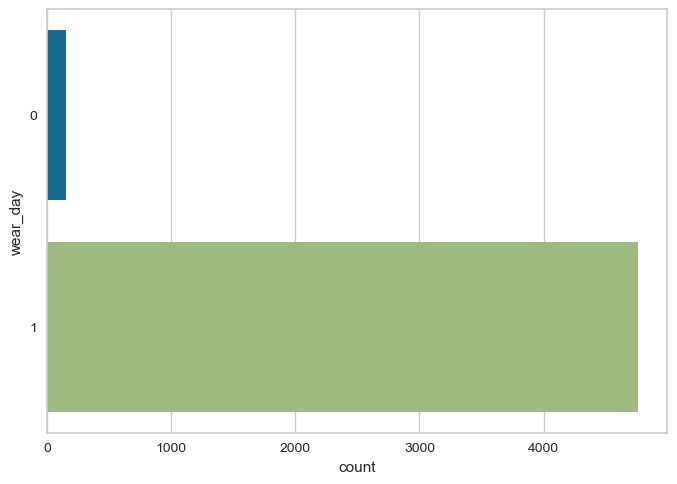

In [376]:
sns.countplot(y="wear_day", data=df)

In [377]:
df['wear_day'].value_counts()

1    4758
0     149
Name: wear_day, dtype: int64

In [378]:
#create_report(df).show_browser()

# Replace steps < 500 with user's median

In [379]:
df = df.astype({"id": str})
ids = list(np.unique((df[['id']])))
len(ids)

71

In [380]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df.loc[user_df['steps'] < 500, 'steps'] = user_df['steps'].median()
    d = pd.concat([d, user_df])

In [381]:
d = d.reset_index()
d

,index,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day
0,0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,1
1,61,621e2e8e67b776a24055b564,33.794544,57.681,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,1
2,105,621e2e8e67b776a24055b564,34.611011,57.481,34.279,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,138,621e2e8e67b776a24055b564,34.408304,57.493,34.279,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967,1
4,196,621e2e8e67b776a24055b564,34.178922,56.750,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,2591,621e375b67b776a240290cdc,33.960471,62.604,34.279,14.8,0.0,0.000000,0.000,0.000000,-1.406661,1699.36,36.08147,4490.0,74.782707,137.0,16.0,12.0,1210.0,72.171246,27450000.0,0.0,401.0,7.0,0.0,89.0,0.986013,0.958333,0.982175,0.984375,6805.0,57.0,1383.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653,1
4903,2661,621e375b67b776a240290cdc,34.011607,55.542,30.813,16.6,81.0,0.700000,0.800,0.933333,-1.467558,2437.51,36.32305,8309.8,91.478693,294.0,59.0,43.0,567.0,69.927633,24960000.0,0.0,359.0,57.0,0.0,91.0,1.000000,1.096154,0.960177,1.153846,13187.0,366.0,1036.0,37.0,0.0,0.0,1.0,1,0.0,1.

In [382]:
#create_report(d).show_browser()

In [383]:
df = d.drop(columns='index')
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,1
1,621e2e8e67b776a24055b564,33.794544,57.681,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,1
2,621e2e8e67b776a24055b564,34.611011,57.481,34.279,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,1
3,621e2e8e67b776a24055b564,34.408304,57.493,34.279,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967,1
4,621e2e8e67b776a24055b564,34.178922,56.750,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,33.960471,62.604,34.279,14.8,0.0,0.000000,0.000,0.000000,-1.406661,1699.36,36.08147,4490.0,74.782707,137.0,16.0,12.0,1210.0,72.171246,27450000.0,0.0,401.0,7.0,0.0,89.0,0.986013,0.958333,0.982175,0.984375,6805.0,57.0,1383.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653,1
4903,621e375b67b776a240290cdc,34.011607,55.542,30.813,16.6,81.0,0.700000,0.800,0.933333,-1.467558,2437.51,36.32305,8309.8,91.478693,294.0,59.0,43.0,567.0,69.927633,24960000.0,0.0,359.0,57.0,0.0,91.0,1.000000,1.096154,0.960177,1.153846,13187.0,366.0,1036.0,37.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [384]:
#create_report(df).show_browser()

# Adds stress_quantile

In [385]:
df["stress_quantile"] = pd.qcut(df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=["low", "medium", "high"])

In [386]:
df['stress_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)

<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

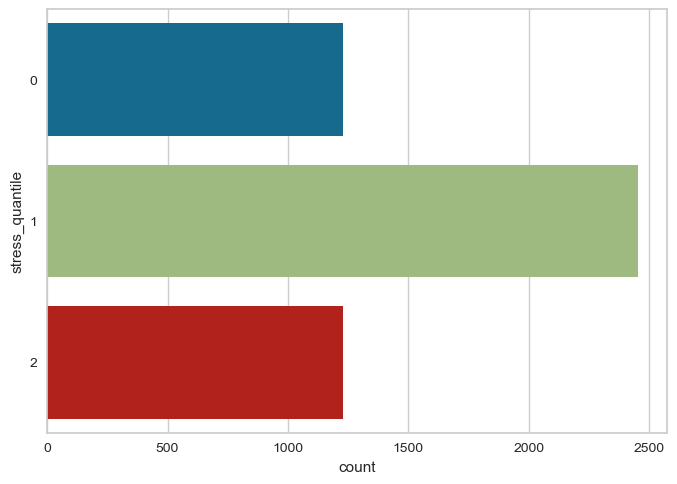

In [387]:
sns.countplot(y="stress_quantile", data=df)

In [388]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df["user_stress_quantile"] = pd.qcut(user_df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=[0, 1, 2])
    d = pd.concat([d, user_df])
    
df=d
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day,stress_quantile,user_stress_quantile
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,1,2,1
1,621e2e8e67b776a24055b564,33.794544,57.681,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,1,2,2
2,621e2e8e67b776a24055b564,34.611011,57.481,34.279,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,1,2,2
3,621e2e8e67b776a24055b564,34.408304,57.493,34.279,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967,1,2,2
4,621e2e8e67b776a24055b564,34.178922,56.750,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,33.960471,62.604,34.279,14.8,0.0,0.000000,0.000,0.000000,-1.406661,1699.36,36.08147,4490.0,74.782707,137.0,16.0,12.0,1210.0,72.171246,27450000.0,0.0,401.0,7.0,0.0,89.0,0.986013,0.958333,0.982175,0.984375,6805.0,57.0,1383.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653,1,0,0
4903,621e375b67b776a240290cdc,34.011607,55.542,30.813,16.6,81.0,0.700000,0.800,0.933333,-1.467558,2437.51,36.32305,8309.8,91.478693,294.0,59.0,43.0,567.0,69.927633,24960000.0,0.0,359.0,57.0,0.0,91.0,1.000000,1.096154,0.960177,1.153846,13187.0,366.0,

<AxesSubplot: xlabel='count', ylabel='user_stress_quantile'>

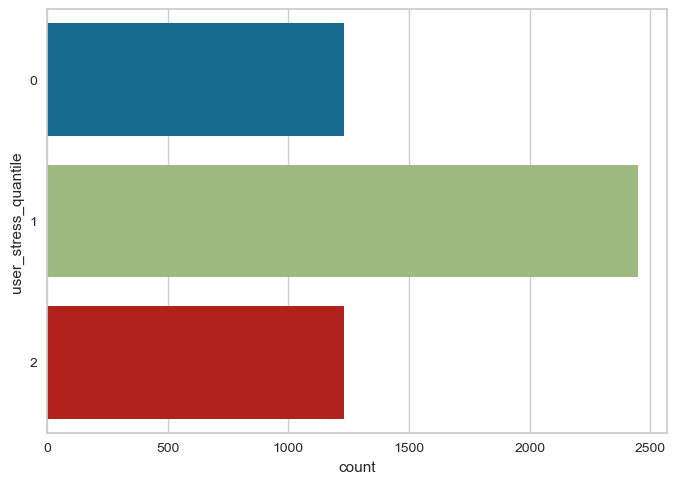

In [389]:
sns.countplot(y="user_stress_quantile", data=df)

In [390]:
#create_report(df).show_browser() # stress_quantile and user_stress quantile are NOT identical, keep them both

# Adds sleep duration average values for each user

In [391]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_sleep_duration'] = user_df['sleep_duration'].mean()
    d = pd.concat([d, user_df])

In [392]:
df=d

# Adds steps average values for each user

In [393]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_steps'] = user_df['steps'].mean()
    d = pd.concat([d, user_df])

In [394]:
df=d